In [21]:
from torch.utils.data import Dataset, DataLoader 
import torch
import torch.nn as nn
from torch.optim import SGD

In [22]:
# datasets fictícios
x = [[1,2], [3,4], [5,6], [7,8]]
y = [[3], [7], [11], [15]]

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [25]:
# criação de uma classe para o processamento do dataset
class MyDataset(Dataset): # herdando da classe Dataset
    def __init__(self, x, y): # recebe os conjuntos x e y
        super().__init__()
        self.x = torch.tensor(x).float().to(device) # converte x para um tensor de floats e o armazena na gpu
        self.y = torch.tensor(y).float().to(device) # converte y para um tensor de floats e o armazena na gpu
    
    def __len__(self): 
        return len(self.x) # assume-se que init já foi executada
    
    def __getitem__(self, ix): # retorna os itens de indice ix em self.x e self.y
        return self.x[ix], self.y[ix]

In [26]:
ds = MyDataset(x, y) # cria uma instância de MyDataset com as listas x e y

In [27]:
# cria um dataloader, que cria mini-batches e retorna um objeto iterável que yielda eses mini-batches
dl = DataLoader(ds, batch_size = 2, shuffle = True) # batches de 2 pares (xi, yi) e com randomização

In [28]:
# criação da classe do modelo
class MyNeuralNet(nn.Module): # herdando da classe nn.Module
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 8) # camada densa linear que recebe 2 valores e retorna 8
        self.activation = nn.ReLU() # camada de ativação com ReLU
        self.layer2 = nn.Linear(8, 1) # camada de saída, densa e linear, que recebe 8 valores e retorna 1
        
    def forward(self, x): # método chamado quando um objeto de MyNeuralNet recebe um input
        x = self.layer1(x) # recebe x, de 2 valores, e retorna 8
        x = self.activation(x) # recebe os 8 valores e aplica ReLU neles
        x = self.layer2(x) # recebe os 8 valores transformados e retorna 1 previsão
        return x # retorna o valor previsto
        

In [31]:
model = MyNeuralNet() # cria uma instância da rede
model.to(device)
loss_func = nn.MSELoss() # cria uma instância da MSE, já que estamos fazendo regressão
opt = SGD(model.parameters(), lr = 0.001) # cria uma instância de SGD com os parâmetros de model e taxa de apredizado de 0.001

In [33]:
# loop de treinamento
losses = [] # lista que irá armazenar os erros de cada epoch
for _ in range(50): # itera por 50 epochs
    for data in dl: # itera por batches 2x2 randomizados gerados por dl apartir de ds
        opt.zero_grad() # zera os gradientes antes de cada epoch
        x1, y1 = data # separa os elementos da tupla em variáveis
        loss_value = loss_func(model(x1), y1) # calcula e armazena o erro
        loss_value.backward() # aplica backpropagation e armazena os gradientes de cada elementos de cada tensor no parâmetro .grad
        opt.step() # aplica os gradientes com as regras do SGD
        losses.append(loss_value.detach().cpu().numpy()) # extrai o valor do erro do grafo computacional, transoforma pra array numpy e adiciona a lista losses

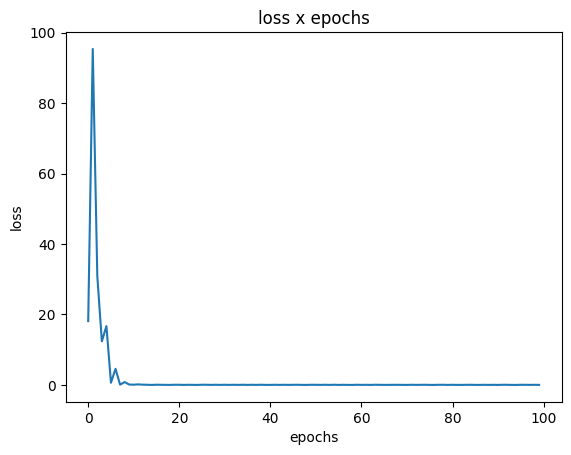

In [34]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title('loss x epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()